In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', cmap='Greys')
import rpy2 
%load_ext rpy2.ipython
%run pybase
%run heavysnow 

In [2]:
### Example 2
np.random.seed(777)
import math
pi=math.pi
n=60
ang=np.linspace(-pi,pi-2*pi/n,n)
V=np.arange(n)+1
r=1
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=vx*0

f2=vx*0
f2[vy<0]=3+np.random.normal(size=sum(vy<0),scale=0.1)
f2[vy>=0]= -3+np.random.normal(size=sum(vy>=0),scale=0.1)

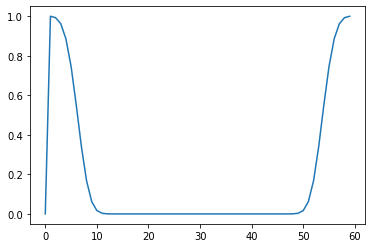

In [3]:
# Edg setting
Σ=l2distance(np.matrix([vx,vy]).T)
θ=0.35
W=np.exp(-Σ**2/(2*θ**2))-np.eye(n,n)
E=W>0
plt.plot(W[0,:].T)
# color
import matplotlib.cm as cm
col=list(np.array(cm.rainbow((ang+pi)/2/pi)))

In [4]:
gs1=GraphSignal(V,W,f1)
gs2=GraphSignal(V,W,f2)

### Diffusion distance

[[0.         0.08727822 0.08664285 ... 0.08397182 0.08664285 0.08727822]
 [0.08727822 0.         0.08727822 ... 0.07728965 0.08397182 0.08664285]
 [0.08664285 0.08727822 0.         ... 0.06514026 0.07728965 0.08397182]
 ...
 [0.08397182 0.07728965 0.06514026 ... 0.         0.08727822 0.08664285]
 [0.08664285 0.08397182 0.07728965 ... 0.08727822 0.         0.08727822]
 [0.08727822 0.08664285 0.08397182 ... 0.08664285 0.08727822 0.        ]]


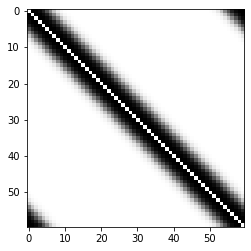

In [5]:
P=W/W.round(3).sum(axis=0)[0]
print(P)
plt.imshow(P)

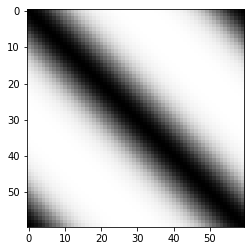

In [6]:
plt.imshow(P@P@P@P)

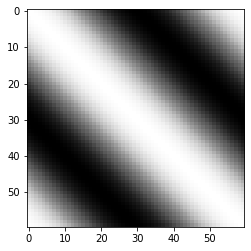

In [7]:
P4=P@P@P@P
diffusion_distance=l2distance(P4)
plt.imshow(diffusion_distance)

### Snow distance

In [8]:
hs1=HeavySnowTransform(gs1)
hs2=HeavySnowTransform(gs2)

In [9]:
hs1.snow(tau=100000,b=0.05)
hs2.snow(tau=100000,b=0.05)

HST (tau= 100000, b=0.05)
100000/100000
HST completed and all history is recorded.
HST (tau= 100000, b=0.05)
100000/100000
HST completed and all history is recorded.


In [10]:
from sklearn.decomposition import PCA 
p1=PCA(n_components=3)
p2=PCA(n_components=3)
p3=PCA(n_components=3)
p4=PCA(n_components=3)
p5=PCA(n_components=3)
p6=PCA(n_components=3)


p1.fit(hs1.eucliddistance)
p2.fit(diffusion_distance)
p3.fit(hs1.snowdistance)
p4.fit(hs2.eucliddistance)
p5.fit(diffusion_distance)
p6.fit(hs2.snowdistance)

r1=p1.transform(hs1.eucliddistance)
r2=p2.transform(diffusion_distance)
r3=p3.transform(hs1.snowdistance)
r4=p4.transform(hs2.eucliddistance)
r5=p5.transform(diffusion_distance)
r6=p6.transform(hs2.snowdistance)

/home/cgb3/anaconda3/envs/py38r40/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


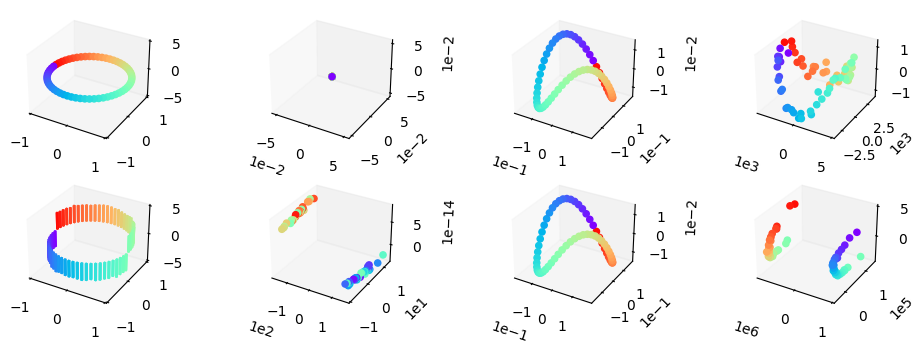

In [95]:
# 1. 
p=plt.figure(figsize=(12,4), dpi=100)  # Make figure object 

# 2. 
ax1=p.add_subplot(2,4,1, projection='3d')
ax2=p.add_subplot(2,4,2, projection='3d')
ax3=p.add_subplot(2,4,3, projection='3d')
ax4=p.add_subplot(2,4,4, projection='3d')
ax5=p.add_subplot(2,4,5, projection='3d')
ax6=p.add_subplot(2,4,6, projection='3d')
ax7=p.add_subplot(2,4,7, projection='3d')
ax8=p.add_subplot(2,4,8, projection='3d')

# 3. 
ax1.grid(False)
ax1.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax1.scatter3D(vx, vy, f1, c=col,alpha=1)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax1.set_zlim(-5,5)

ax2.grid(False)
ax2.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax2.scatter3D(r1[:,0],r1[:,1],r1[:,2],s=20,c=col,alpha=1)

ax3.grid(False)
ax3.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax3.scatter3D(r2[:,0],r2[:,1],r2[:,2],s=20,c=col,alpha=1)

ax4.grid(False)
ax4.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax4.scatter3D(r3[:,0],r3[:,1],r3[:,2],s=20,c=col,alpha=1)


ax5.grid(False)
ax5.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax5.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax5.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = -f2
bottom = np.zeros_like(top)
width=depth=0.05
ax5.bar3d(vx, vy, bottom, width, depth, top, shade=False,color=col)
ax5.set_xlim(-1,1)
ax5.set_ylim(-1,1)
ax5.set_zlim(-5,5)

ax6.grid(False)
ax6.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax6.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax6.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax6.scatter3D(r4[:,0],r4[:,1],r4[:,2],s=20,c=col,alpha=1)

ax7.grid(False)
ax7.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax7.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax7.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax7.scatter3D(r5[:,0],r5[:,1],r5[:,2],s=20,c=col,alpha=1)

ax8.grid(False)
ax8.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax8.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax8.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax8.scatter3D(r6[:,0],r6[:,1],r6[:,2],s=20,c=col,alpha=1)
#p.tight_layout(h_pad=2.6) #rect : tuple (left, bottom, right, top), optional
p.savefig('temp.pdf',transparent=True)

/tmp/ipykernel_25956/1733975175.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  p.savefig("temp.pdf",tranparent=True)


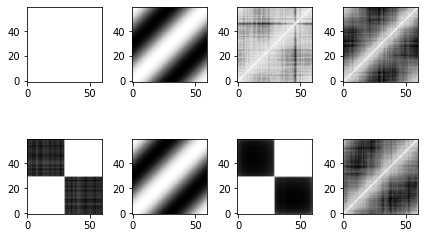

In [29]:
brk=15000
p, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4) 
ax1.imshow(hs1.eucliddistance,origin='lower')
ax2.imshow(diffusion_distance,origin='lower')
ax3.imshow(l2distance(hs1.snowygrounds[:,0:brk]),origin='lower')
ax4.imshow(l2distance(hs1.snowygrounds[:,brk:]),origin='lower')
ax5.imshow(hs2.eucliddistance,origin='lower')
ax6.imshow(diffusion_distance,origin='lower')
ax7.imshow(l2distance(hs2.snowygrounds[:,0:brk]),origin='lower')
ax8.imshow(l2distance(hs2.snowygrounds[:,brk:]),origin='lower')
p.tight_layout() #rect : tuple (left, bottom, right, top), optional
p.savefig("temp.pdf",tranparent=True)

In [30]:
hs1_eucliddistance=hs1.eucliddistance
diffusion_distance=diffusion_distance
hs1_sigma1=l2distance(hs1.snowygrounds[:,:brk])
hs1_sigma2=l2distance(hs1.snowygrounds[:,brk:])
hs2_eucliddistance=hs2.eucliddistance
diffusion_distance=diffusion_distance
hs2_sigma1=l2distance(hs2.snowygrounds[:,:brk])
hs2_sigma2=l2distance(hs2.snowygrounds[:,brk:])

In [31]:
%R -i hs1_eucliddistance,diffusion_distance,hs1_sigma1,hs1_sigma2,hs2_eucliddistance,hs2_sigma1,hs2_sigma2

In [66]:
%%R
library(tidyverse)
library(gridExtra)
library(latex2exp)
n=60
grid<-expand.grid(x=1:n,y=1:n)
W_Graph_long_caseA<-as_tibble(cbind(grid,as.vector(diffusion_distance)));names(W_Graph_long_caseA)<-c("x","y","W")
W_Euclid_long_caseA<-as_tibble(cbind(grid,as.vector(hs1_eucliddistance)));names(W_Euclid_long_caseA)<-c("x","y","W")
W_HST1_long_caseA<-as_tibble(cbind(grid,as.vector(hs1_sigma1)));names(W_HST1_long_caseA)<-c("x","y","W")
W_HST2_long_caseA<-as_tibble(cbind(grid,as.vector(hs1_sigma2)));names(W_HST2_long_caseA)<-c("x","y","W")

W_Graph_long_caseB<-as_tibble(cbind(grid,as.vector(diffusion_distance)));names(W_Graph_long_caseB)<-c("x","y","W")
W_Euclid_long_caseB<-as_tibble(cbind(grid,as.vector(hs2_eucliddistance)));names(W_Euclid_long_caseB)<-c("x","y","W")
W_HST1_long_caseB<-as_tibble(cbind(grid,as.vector(hs2_sigma1)));names(W_HST1_long_caseB)<-c("x","y","W")
W_HST2_long_caseB<-as_tibble(cbind(grid,as.vector(hs2_sigma2)));names(W_HST2_long_caseB)<-c("x","y","W")

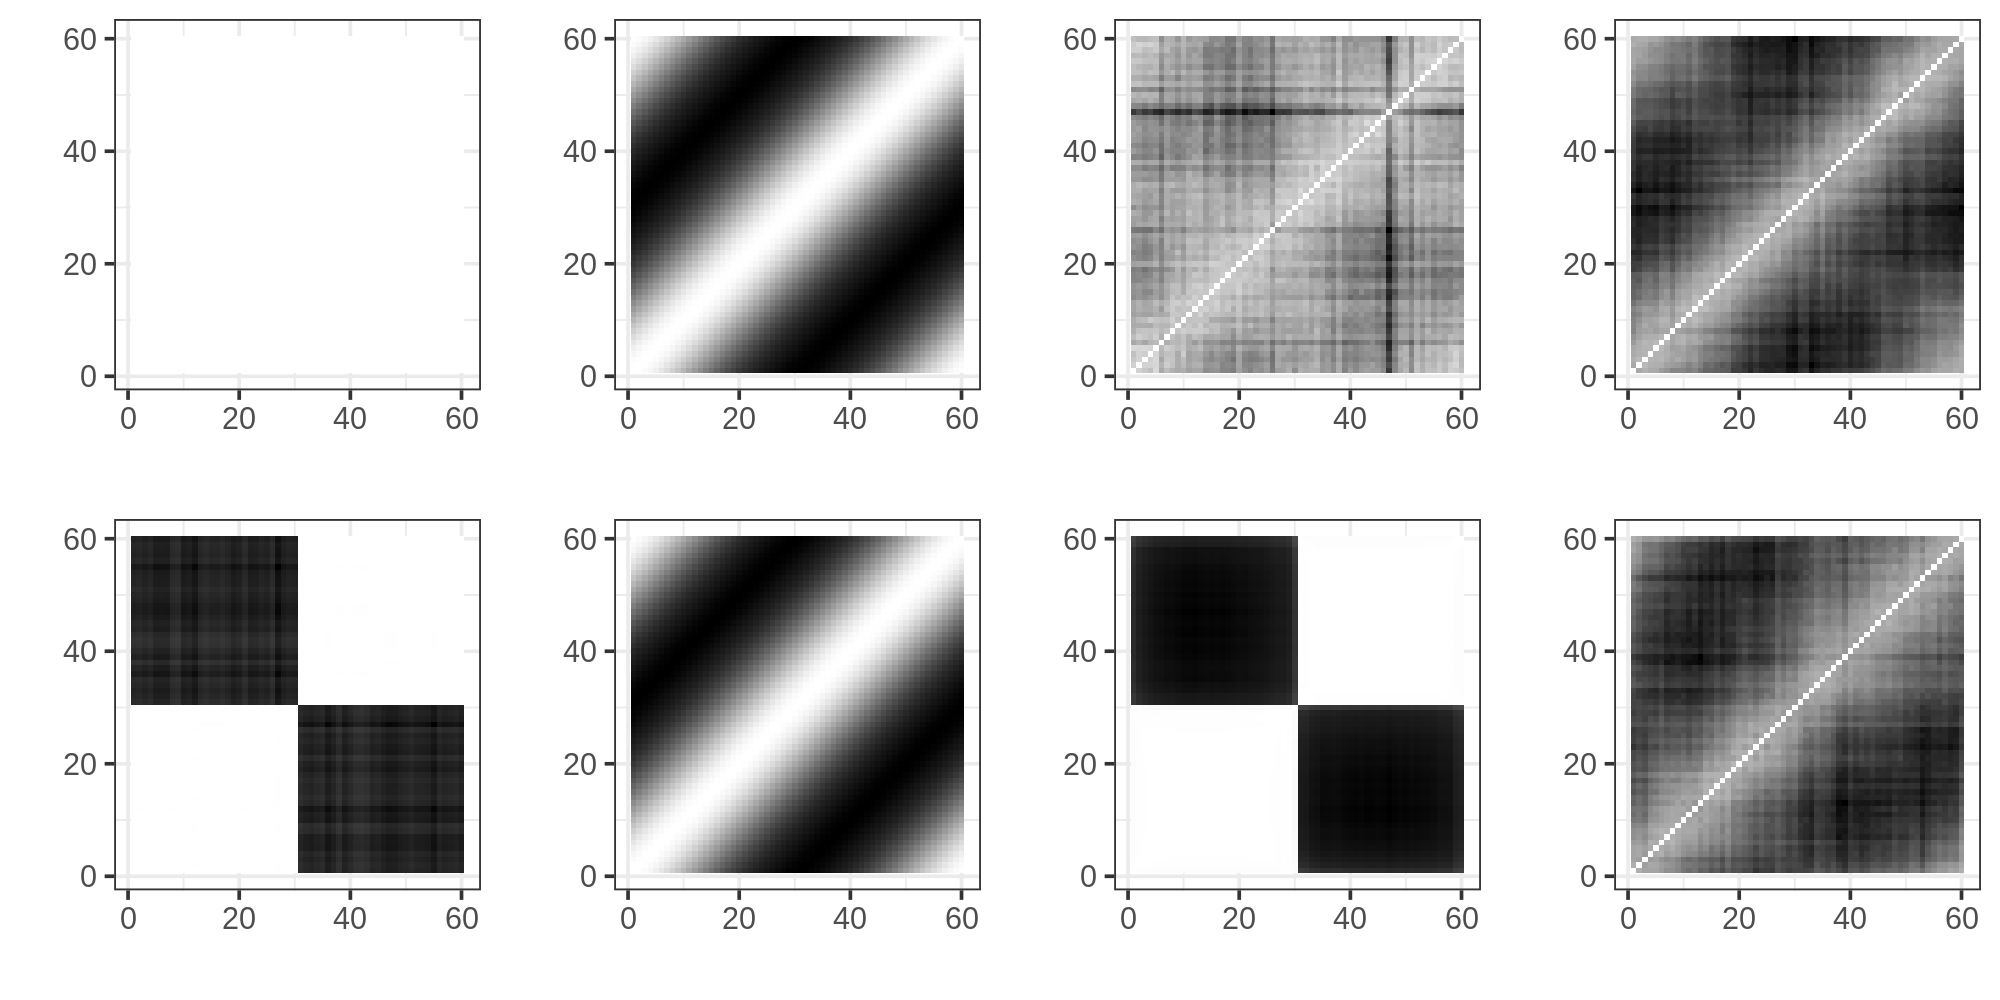

In [83]:
%%R -w 2000 -h 1000 -r 250
fig1<-ggplot()+geom_tile(data=W_Euclid_long_caseA,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())

fig2<-ggplot()+geom_tile(data=W_Graph_long_caseA,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())

fig3<-ggplot()+geom_tile(data=W_HST1_long_caseA,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())

fig4<-ggplot()+geom_tile(data=W_HST2_long_caseA,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())

fig5<-ggplot()+geom_tile(data=W_Euclid_long_caseB,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())

fig6<-ggplot()+geom_tile(data=W_Graph_long_caseB,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())


fig7<-ggplot()+geom_tile(data=W_HST1_long_caseB,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())

fig8<-ggplot()+geom_tile(data=W_HST2_long_caseB,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
theme(legend.position="none")+theme(legend.key=element_blank())


# fig1_4<-eigenplot(gfftrslt_Euclid)+ylim(0,2)+theme_light()
# fig1_5<-eigenplot(gfftrslt_Graph)+ylim(0,2)+theme_light()
# fig1_6<-eigenplot(gfftrslt_HST)+ylim(0,2)+theme_light()
fig=grid.arrange(fig1,fig2,fig3,fig4,fig5,fig6,fig7,fig8,ncol=4,nrow=2)
fig
ggsave(plot=fig,"temp.pdf",width=10,height=5)